# Импорты библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Чтение данных

In [2]:
data_path = Path('data/app_survey.csv')
df = pd.read_csv(data_path, parse_dates=['survey_creation_dt', 'survey_response_dt'])

print(f"Данные загружены из {data_path}")
print(f"Размерность данных: {df.shape}")
print(f"Количество строк: {df.shape[0]:,}")
print(f"Количество столбцов: {df.shape[1]}")

df.head()

Данные загружены из data/app_survey.csv
Размерность данных: (42387, 9)
Количество строк: 42,387
Количество столбцов: 9


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


# Первичный анализ данных

             Количество пропусков  Процент пропусков
user_income                 10374          24.474485
language                     6826          16.103994
age                          1448           3.416142


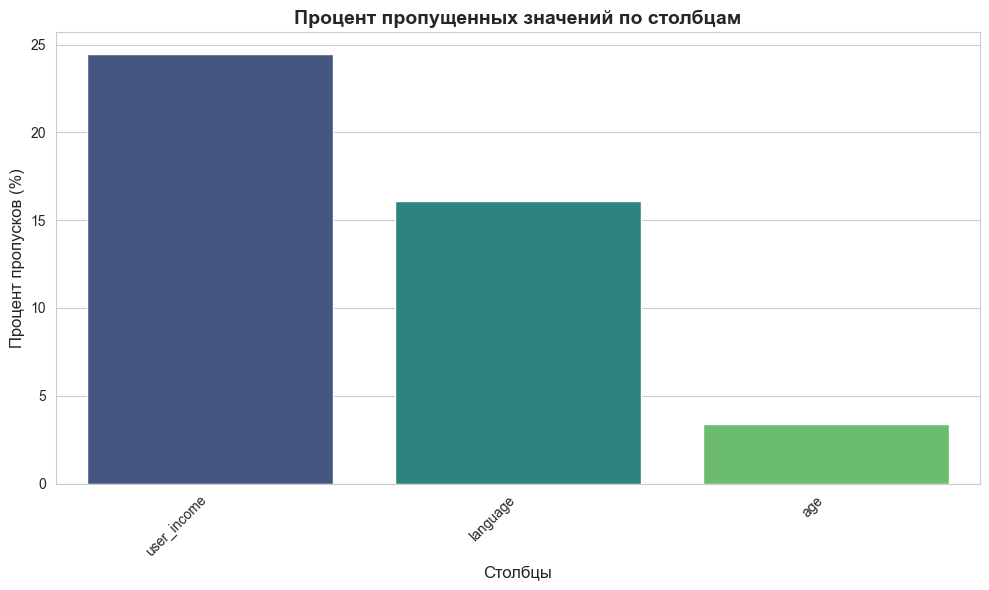


Общее количество пропущенных значений: 18648


In [3]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
})
missing_df = missing_df[missing_df['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df.reset_index(), x='index', y='Процент пропусков', 
                hue='index', palette='viridis', legend=False)
    plt.title('Процент пропущенных значений по столбцам', fontsize=14, fontweight='bold')
    plt.xlabel('Столбцы', fontsize=12)
    plt.ylabel('Процент пропусков (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\nОбщее количество пропущенных значений: {df.isnull().sum().sum()}")
else:
    print("Пропущенных значений не обнаружено")



## Описательная статистика


In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols:
    print(df[numeric_cols].describe())

exclude_cols = ['user_id', 'survey_creation_dt', 'survey_response_dt']
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns 
                    if col not in exclude_cols]

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Уникальных значений: {df[col].nunique()}")
    print(f"  Топ-5 значений:")
    print(df[col].value_counts().head())


         csat_level  tenure_years
count  42387.000000  42387.000000
mean       4.102767      9.801147
std        1.506246      7.591410
min        1.000000      0.000000
25%        4.000000      2.132807
50%        5.000000      9.308819
75%        5.000000     16.941052
max        5.000000     21.195642

language:
  Уникальных значений: 1
  Топ-5 значений:
language
RU    35561
Name: count, dtype: int64

age:
  Уникальных значений: 5
  Топ-5 значений:
age
35-44    11835
25-34     9669
45-54     9483
55-65     6312
18-24     3640
Name: count, dtype: int64

gender:
  Уникальных значений: 2
  Топ-5 значений:
gender
M    32413
F     9974
Name: count, dtype: int64

user_income:
  Уникальных значений: 6
  Топ-5 значений:
user_income
10000-25000     18354
25000-44000      6206
>100000          2418
44000-68000      2095
68000-100000     1641
Name: count, dtype: int64


## Анализ целевой переменной


csat_level
1     6732
2     1187
3     2175
4     3192
5    29101
Name: count, dtype: int64

Средняя оценка: 4.10
Медианная оценка: 5.00


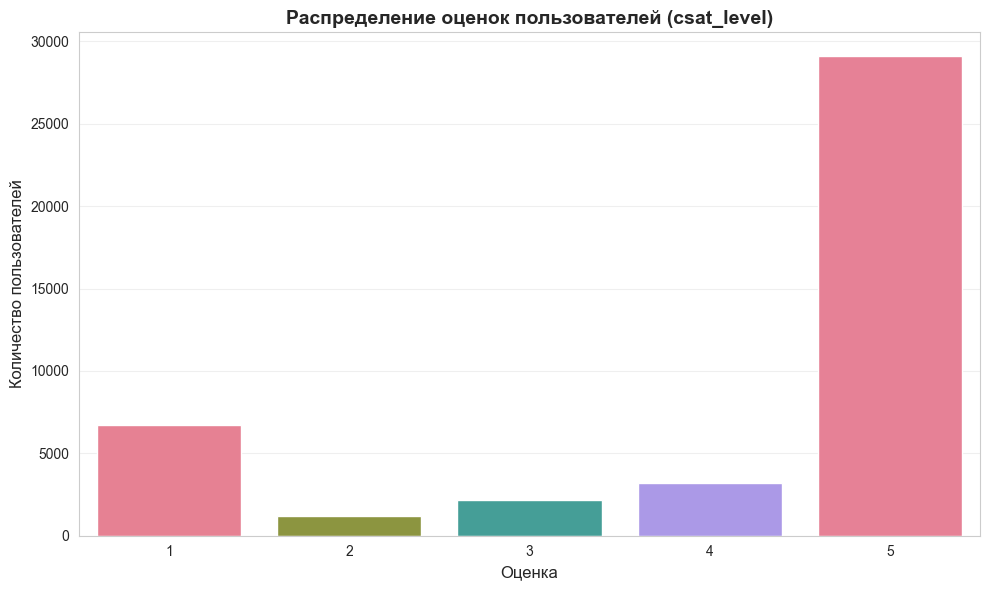

In [5]:
print(df['csat_level'].value_counts().sort_index())
print(f"\nСредняя оценка: {df['csat_level'].mean():.2f}")
print(f"Медианная оценка: {df['csat_level'].median():.2f}")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='csat_level', hue='csat_level', palette='husl', 
              order=sorted(df['csat_level'].unique()), legend=False)
plt.title('Распределение оценок пользователей (csat_level)', fontsize=14, fontweight='bold')
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Проверка дубликатов и уникальности


In [6]:
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")

print(f"\nВсего записей: {len(df)}")
print(f"Уникальных user_id: {df['user_id'].nunique()}")
print(f"Дубликатов user_id: {df['user_id'].duplicated().sum()}")


Количество полных дубликатов строк: 0

Всего записей: 42387
Уникальных user_id: 40065
Дубликатов user_id: 2322


## Проверка дат и времени ответа


In [7]:
invalid_dates = (df['survey_response_dt'] < df['survey_creation_dt']).sum()
print(f"Записей с датой ответа раньше даты создания: {invalid_dates}")

df['response_time_days'] = (df['survey_response_dt'] - df['survey_creation_dt']).dt.total_seconds() / (24 * 3600)
print(f"\nСтатистика времени ответа (дни):")
print(df['response_time_days'].describe())

negative_response_time = (df['response_time_days'] < 0).sum()
print(f"\nЗаписей с отрицательным временем ответа: {negative_response_time}")


Записей с датой ответа раньше даты создания: 18400

Статистика времени ответа (дни):
count    42387.000000
mean         1.446449
std          8.750098
min        -19.582558
25%         -4.581620
50%          1.421250
75%          7.492581
max         31.215660
Name: response_time_days, dtype: float64

Записей с отрицательным временем ответа: 18400


## Выбросы


In [8]:
Q1 = df['tenure_years'].quantile(0.25)
Q3 = df['tenure_years'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df['tenure_years'] < lower_bound) | (df['tenure_years'] > upper_bound)).sum()
print(f"Выбросы в tenure_years (метод IQR): {outliers}")
print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")


Выбросы в tenure_years (метод IQR): 0
  Границы: [-20.08, 39.15]


## Анализ по месяцам


Распределение оценок по месяцам:
            count      mean  median       std
month_name                                   
Апрель      13915  4.079770     5.0  1.523272
Май         28472  4.114007     5.0  1.497753

Разница средних оценок (Май - Апрель): 0.034

Апрель (месяц 4):
  Количество записей: 13915
  Средняя оценка: 4.080
  Медианная оценка: 5.00
  Распределение (%):
    1: 16.4%
    2: 2.9%
    3: 5.1%
    4: 7.5%
    5: 68.1%

Май (месяц 5):
  Количество записей: 28472
  Средняя оценка: 4.114
  Медианная оценка: 5.00
  Распределение (%):
    1: 15.6%
    2: 2.8%
    3: 5.2%
    4: 7.6%
    5: 68.9%


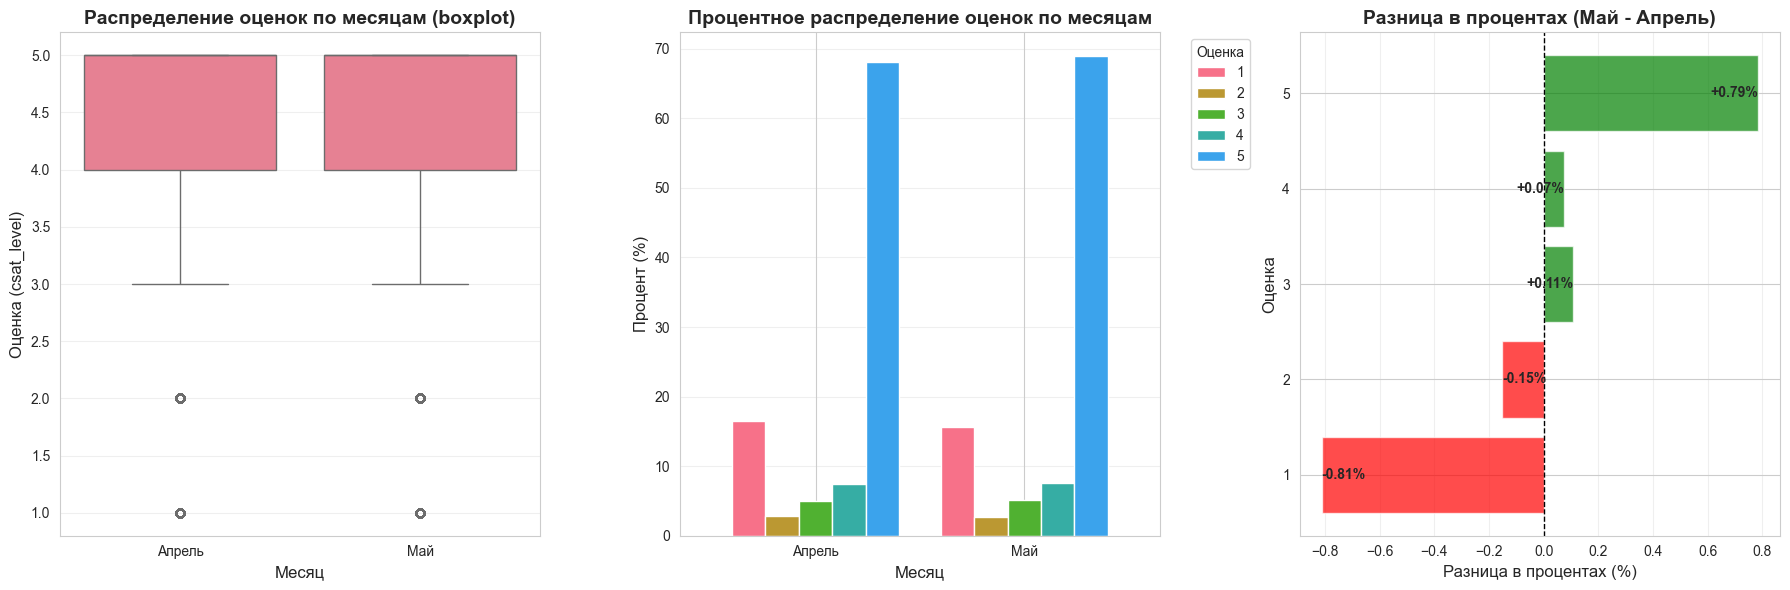

In [9]:
df['creation_month'] = df['survey_creation_dt'].dt.month
month_names = {4: 'Апрель', 5: 'Май'}
df['month_name'] = df['creation_month'].map(month_names)

print(f"Распределение оценок по месяцам:")
month_stats = df.groupby('month_name')['csat_level'].agg(['count', 'mean', 'median', 'std'])
print(month_stats)

april_data = df[df['creation_month'] == 4]['csat_level']
may_data = df[df['creation_month'] == 5]['csat_level']
diff_mean = may_data.mean() - april_data.mean()
print(f"\nРазница средних оценок (Май - Апрель): {diff_mean:.3f}")

for month in [4, 5]:
    month_data = df[df['creation_month'] == month]['csat_level']
    month_name = month_names[month]
    print(f"\n{month_name} (месяц {month}):")
    print(f"  Количество записей: {len(month_data)}")
    print(f"  Средняя оценка: {month_data.mean():.3f}")
    print(f"  Медианная оценка: {month_data.median():.2f}")
    print(f"  Распределение (%):")
    month_pct = month_data.value_counts(normalize=True).sort_index() * 100
    for score, pct in month_pct.items():
        print(f"    {score}: {pct:.1f}%")

month_dist = pd.crosstab(df['month_name'], df['csat_level'], normalize='index') * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='month_name', y='csat_level', order=['Апрель', 'Май'], ax=axes[0])
axes[0].set_title('Распределение оценок по месяцам (boxplot)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Месяц', fontsize=12)
axes[0].set_ylabel('Оценка (csat_level)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

month_dist.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Процентное распределение оценок по месяцам', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Месяц', fontsize=12)
axes[1].set_ylabel('Процент (%)', fontsize=12)
axes[1].legend(title='Оценка', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

diff_pct = month_dist.loc['Май'] - month_dist.loc['Апрель']
colors = ['red' if x < 0 else 'green' for x in diff_pct.values]
axes[2].barh(range(len(diff_pct)), diff_pct.values, color=colors, alpha=0.7)
axes[2].set_yticks(range(len(diff_pct)))
axes[2].set_yticklabels(diff_pct.index)
axes[2].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[2].set_title('Разница в процентах (Май - Апрель)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Разница в процентах (%)', fontsize=12)
axes[2].set_ylabel('Оценка', fontsize=12)
axes[2].grid(axis='x', alpha=0.3)
for i, (score, diff) in enumerate(diff_pct.items()):
    axes[2].text(diff, i, f'{diff:+.2f}%', va='center', 
                ha='left' if diff < 0 else 'right', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


## Анализ по полу


Распределение оценок по полу:
        count      mean  median
gender                         
F        9974  4.050732     5.0
M       32413  4.118780     5.0

Доля по полу:
  M: 76.5%
  F: 23.5%

Мужчины (M):
  Количество записей: 32413
  Средняя оценка: 4.12
  Медианная оценка: 5.00
  Распределение:
csat_level
1     5012
2      911
3     1658
4     2466
5    22366
Name: count, dtype: int64

Женщины (F):
  Количество записей: 9974
  Средняя оценка: 4.05
  Медианная оценка: 5.00
  Распределение:
csat_level
1    1720
2     276
3     517
4     726
5    6735
Name: count, dtype: int64


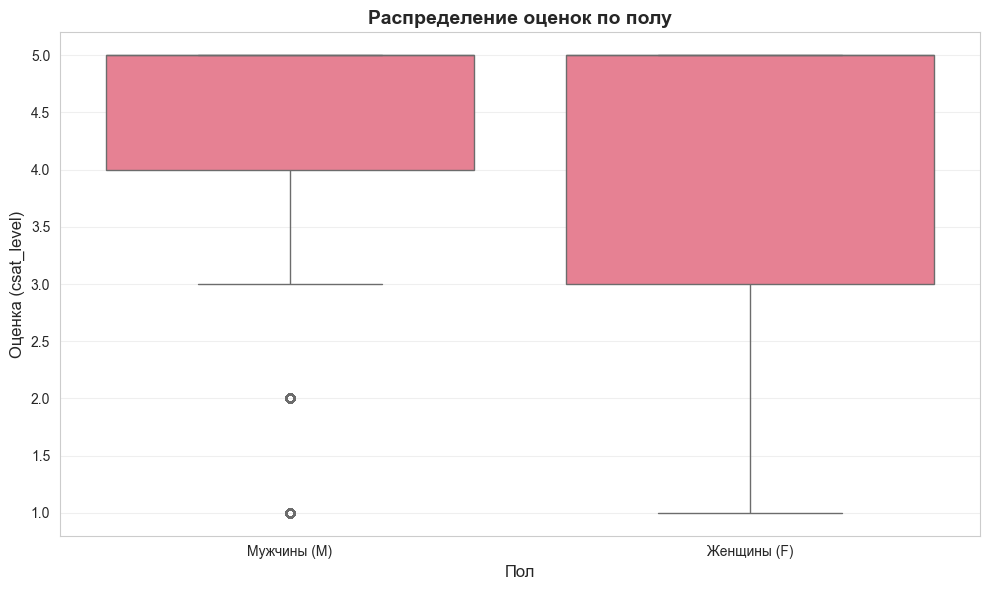

In [10]:
print(f"Распределение оценок по полу:")
gender_stats = df.groupby('gender')['csat_level'].agg(['count', 'mean', 'median'])
gender_pct = df['gender'].value_counts(normalize=True) * 100
print(gender_stats)
print(f"\nДоля по полу:")
for gender, pct in gender_pct.items():
    print(f"  {gender}: {pct:.1f}%")

for gender in ['M', 'F']:
    gender_data = df[df['gender'] == gender]['csat_level']
    gender_name = 'Мужчины' if gender == 'M' else 'Женщины'
    print(f"\n{gender_name} ({gender}):")
    print(f"  Количество записей: {len(gender_data)}")
    print(f"  Средняя оценка: {gender_data.mean():.2f}")
    print(f"  Медианная оценка: {gender_data.median():.2f}")
    print(f"  Распределение:")
    print(gender_data.value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='csat_level', order=['M', 'F'])
plt.title('Распределение оценок по полу', fontsize=14, fontweight='bold')
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Оценка (csat_level)', fontsize=12)
plt.xticks([0, 1], ['Мужчины (M)', 'Женщины (F)'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Очистка данных


In [11]:
initial_rows = len(df)
print(f"Исходное количество строк: {initial_rows:,}")

df_clean = df[df['response_time_days'] >= 0].copy()
rows_removed_dates = initial_rows - len(df_clean)
print(f"Удалено записей с некорректными датами: {rows_removed_dates}")

language_missing_before = df_clean['language'].isnull().sum()
if language_missing_before > 0:
    df_clean['language'] = df_clean['language'].fillna('RU')
    print(f"Заполнено пропусков в language: {language_missing_before} -> 0")

print(f"Пропуски в age остаются: {df_clean['age'].isnull().sum()}")
print(f"Пропуски в user_income остаются: {df_clean['user_income'].isnull().sum()}")

duplicates_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
if duplicates_before > 0:
    print(f"Удалено полных дубликатов: {duplicates_before}")

print(f"\nИсходное количество строк: {initial_rows:,}")
print(f"Финальное количество строк: {len(df_clean):,}")
print(f"Удалено строк: {initial_rows - len(df_clean):,}")
print(f"Процент сохраненных данных: {len(df_clean)/initial_rows*100:.2f}%")

df = df_clean.copy()


Исходное количество строк: 42,387
Удалено записей с некорректными датами: 18400
Заполнено пропусков в language: 3854 -> 0
Пропуски в age остаются: 846
Пропуски в user_income остаются: 5916

Исходное количество строк: 42,387
Финальное количество строк: 23,987
Удалено строк: 18,400
Процент сохраненных данных: 56.59%


# Корреляционный анализ для обоснования гипотез


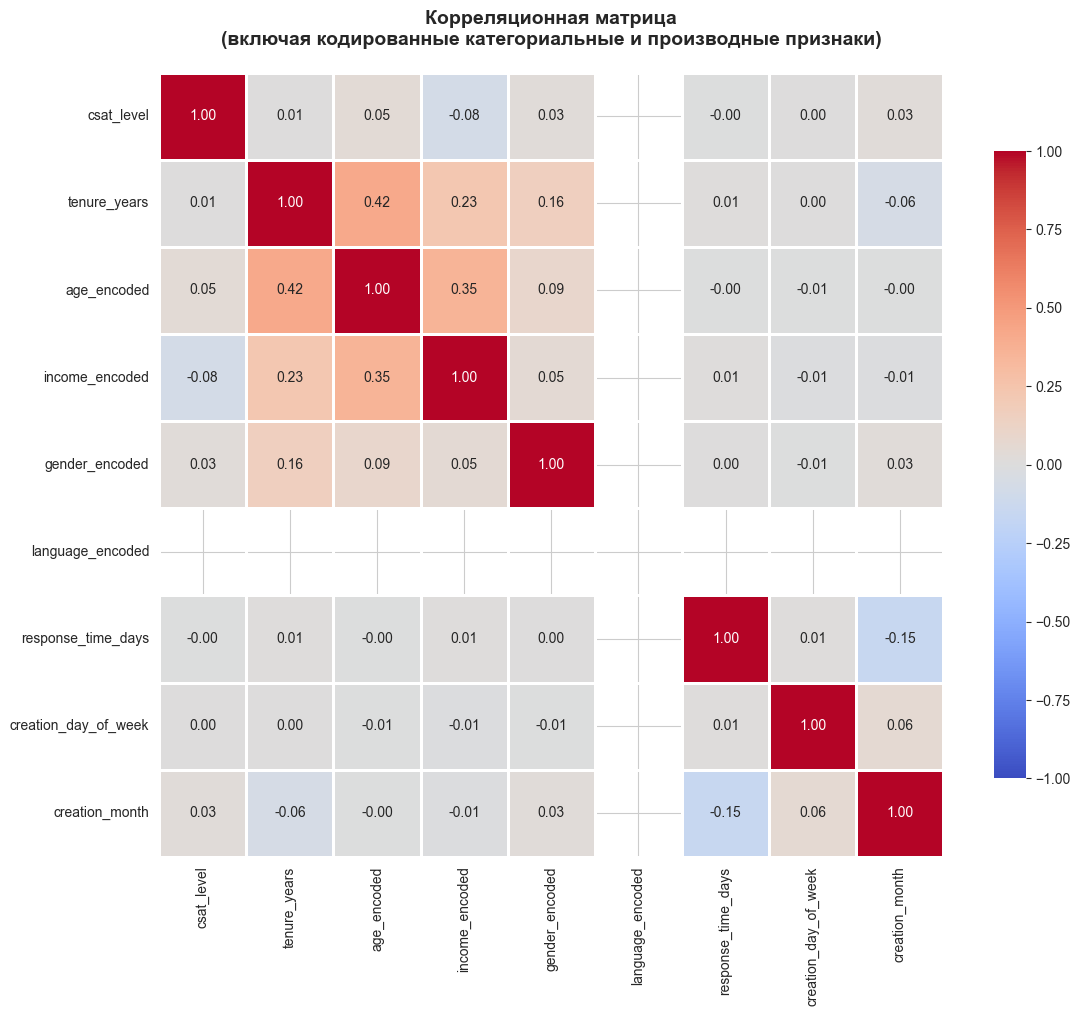


Корреляция с целевой переменной (csat_level):
age_encoded              :  0.046
gender_encoded           :  0.027
creation_month           :  0.027
tenure_years             :  0.008
creation_day_of_week     :  0.002
response_time_days       : -0.003
income_encoded           : -0.076
language_encoded         :    nan


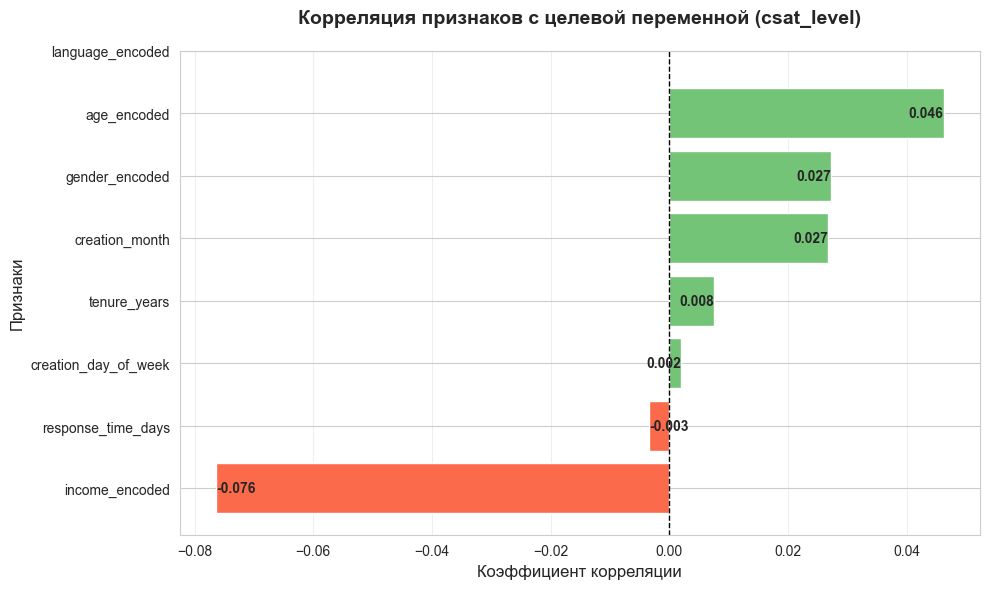

In [12]:
df_corr = df.copy()

age_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-65': 5,
    '>65': 6
}
df_corr['age_encoded'] = df_corr['age'].map(age_mapping)

income_mapping = {
    '<10000': 1,
    '10000-25000': 2,
    '25000-44000': 3,
    '44000-68000': 4,
    '68000-100000': 5,
    '>100000': 6
}
df_corr['income_encoded'] = df_corr['user_income'].map(income_mapping)

df_corr['gender_encoded'] = df_corr['gender'].map({'M': 1, 'F': 0})

df_corr['language_encoded'] = (df_corr['language'] == 'RU').astype(int)

df_corr['creation_day_of_week'] = df_corr['survey_creation_dt'].dt.dayofweek
df_corr['creation_month'] = df_corr['survey_creation_dt'].dt.month

corr_cols = [
    'csat_level',
    'tenure_years',
    'age_encoded',
    'income_encoded',
    'gender_encoded',
    'language_encoded',
    'response_time_days',
    'creation_day_of_week',
    'creation_month'
]

corr_matrix = df_corr[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            vmin=-1, vmax=1)
plt.title('Корреляционная матрица\n(включая кодированные категориальные и производные признаки)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nКорреляция с целевой переменной (csat_level):")
csat_corr = corr_matrix['csat_level'].sort_values(ascending=False)
for col, corr_val in csat_corr.items():
    if col != 'csat_level':
        print(f"{col:25s}: {corr_val:6.3f}")

csat_correlations = corr_matrix['csat_level'].drop('csat_level').sort_values(ascending=True)

plt.figure(figsize=(10, 6))
red_color = sns.color_palette('Reds_r', 1)[0]
green_color = sns.color_palette('Greens', 1)[0]
colors = [red_color if x < 0 else green_color for x in csat_correlations.values]

plt.barh(range(len(csat_correlations)), csat_correlations.values, color=colors)
plt.yticks(range(len(csat_correlations)), csat_correlations.index)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.title('Корреляция признаков с целевой переменной (csat_level)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Коэффициент корреляции', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for i, (idx, val) in enumerate(csat_correlations.items()):
    plt.text(val, i, f'{val:.3f}', va='center', 
            ha='left' if val < 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()


# Гипотезы

### Гипотеза 1: Отрицательная связь дохода с оценкой

**Формулировка:** Пользователи с более высоким доходом дают более низкие оценки.

**Обоснование:** r = -0.076 (самая сильная по модулю корреляция). Пропуски в доходе: 24.47%.

### Гипотеза 2: Положительная связь возраста с оценкой

**Формулировка:** Более старшие возрастные группы дают более высокие оценки.

**Обоснование:** r = 0.046 (наибольшая положительная корреляция). Распределение: 35-44 (11835), 25-34 (9669), 45-54 (9483).



### Гипотеза 3: Мужчины дают более высокие оценки, чем женщины

**Формулировка:** Мужчины дают более высокие оценки удовлетворенности, чем женщины.

**Обоснование:** r = 0.027 (положительная корреляция, где M=1, F=0). Дисбаланс: M (76.4%), F (23.6%).